<a href="https://colab.research.google.com/github/aelshehawy/text-as-data-computational-text-analysis-oxford/blob/main/Code%20Solutions/TextasData_Session3_Excercises_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Excercise 1 - Word-Embeddings**

Using Pandas and sascat_excerpts


- Use the word embeddings on your content column --> create a new column that reflects the content with the word embeddings after text-preprocessing steps
- Make sure to remove all unnecessary columns

In [ ]:
import gensim
# the model is organized like this: word = embeddings
small_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/small-embeddings.txt', binary=False)

In [ ]:
import numpy as np
import string
import nltk

#define that you need to exclude punctuation
exclude = set(string.punctuation)

# this represent any text as a single "doc-embedding" we use it both for the query and the sentences
# input should be a string
def text_embedding(text):
    
    #this works to lower text
    text = text.lower()
    
    # we tokenize the text in single words
    text = nltk.tokenize.WordPunctTokenizer().tokenize(text)
    
    # we remove numbers and punctuation
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    doc_embed = []
    
    # for each word we get the embedding and we append it to a list
    for word in text:
            try:
                embed_word = small_model[word]
                doc_embed.append(embed_word)
            except KeyError as e: # if there is an error we continue
                print (e,word)
                continue
    # we average the embeddings of all the words, getting an overall doc embedding
    if len(doc_embed)>0:
        avg = [float(sum(col))/len(col) for col in zip(*doc_embed)]

        avg = np.array(avg).reshape(1, -1)

        # the output is a doc-embedding
        return avg
    else:
        return "Empty"

In [ ]:
import pandas as pd
sascat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sascat_excerpt.tsv',delimiter="\t")
sascat.head()

,id-snippet,n-sentences,n-words,n-nouns,n-adj,n-verbs,n-entities,n-vague,n-concrete,n-conditionals,Unnamed: 10
0,hr5114-101.1,20,839,441,83,87,76,3,4,5,Provides for the enforcement of all provisions...
1,hr5114-101.2,5,159,77,21,21,9,2,1,1,Requires the delivery of excess defense articl...
2,hr5114-101.3,1,56,29,4,5,3,2,1,1,Prohibits making available any ESF or foreign ...
3,hr5114-101.4,1,110,49,14,12,11,1,0,2,Prohibits the obligation of funds for the Euro...
4,hr5114-101.5,1,27,13,1,6,2,1,0,0,Prohibits assistance to countries which fail t...


In [ ]:
sascat.rename(columns={'id-snippet':'id'}, 
                 inplace=True)
sascat.rename(columns={'Unnamed: 10':'content'}, 
                 inplace=True)
sascat = sascat[['content','id']]

sascat.head()

,content,id
0,Provides for the enforcement of all provisions...,hr5114-101.1
1,Requires the delivery of excess defense articl...,hr5114-101.2
2,Prohibits making available any ESF or foreign ...,hr5114-101.3
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4
4,Prohibits assistance to countries which fail t...,hr5114-101.5


In [ ]:
sascat['embedding'] = sascat['content'].apply(text_embedding)
sascat.head()

"word 'collectability' not in vocabulary" collectability
"word 'reexport' not in vocabulary" reexport
"word 'unobligated' not in vocabulary" unobligated


,content,id,embedding
0,Provides for the enforcement of all provisions...,hr5114-101.1,"[[0.2945227916040852, 0.02285029835535052, 0.0..."
1,Requires the delivery of excess defense articl...,hr5114-101.2,"[[0.2801842834953277, 0.017395800014492126, -0..."
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,"[[0.27701963778012073, 0.02007481886091857, -0..."
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,"[[0.31826480248732103, 0.17578975589207882, -0..."
4,Prohibits assistance to countries which fail t...,hr5114-101.5,"[[0.4065910668245384, -0.1539104645988638, 0.2..."


**Excercise 2 - Word-Embeddings and Cosine-Similarity**

Use the rt_dataset_small.tsv <br>

a) Open the file <br>
b) extract the content of the first article and save it as a string <br>
c) remove this article from the list of articles of the rt_dataset_small<br>
b) restrict the list of articles of the rt_dataset_small to 50 articles<br>
c) use single function that takes a law/document (one row), cleans the article and creates the article-embeddings. 

- You need to embed the content of the first article you extracted. Save one embedding for this article.
- You also need to embed the content of each of the 50 articles from the rt corpus, save the embedding of each article as the last item of the list (Remember we have a list of lists, one list for each article)


c) calculate cosine-similarity between the article embedding and each of the 50 articles' embedding. The cosine similarity can be saved as another item in the list of lists of articles that you have.

PS - You might need to create a function that reshapes the numpy array of the embedding before this step. Read error messages carefully! Stackoverflow is your best friend.

What is the most



In [ ]:
#step 1
import csv

tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close()

['date ', 'title ', 'topic ', 'content']
['24 Jan, 2016 15:18 ', 'Siberian man converts car to ‘DIY tank’ to battle snow (VIDEO)', 'news', 'Siberian frosts and snow-covered roads led mechanic Andrey Romanov, a resident of Omsk, to design an off-road tank-like vehicle using a Soviet Lada Samara car model as a chassis. It took a month and a half for Romanov to modify the 25-year-old car into what he calls a ‘Т-21099 tank\' that is able to overcome snow banks. The owner says his ‘tank’ can accelerate to speeds of 65km per hour and consumes only 16 liters of fuel per 100km. He says that the vehicle is useful in a countryside landscape where nobody clears the snow. "It is really interesting. It can be useful, for example, when you come to the countryside, no one will clear the snow here and it is too far to go with a shovel,” he told Ruptly. “I bolted the shovel to it and cleaned the snow - now it is clean, as you can see. But the main thing is that it is still a hobby." Romanov also said t

In [ ]:
all_lines

[['date ', 'title ', 'topic ', 'content'],
 ['24 Jan, 2016 15:18 ',
  'Siberian man converts car to ‘DIY tank’ to battle snow (VIDEO)',
  'news',
  'Siberian frosts and snow-covered roads led mechanic Andrey Romanov, a resident of Omsk, to design an off-road tank-like vehicle using a Soviet Lada Samara car model as a chassis. It took a month and a half for Romanov to modify the 25-year-old car into what he calls a ‘Т-21099 tank\' that is able to overcome snow banks. The owner says his ‘tank’ can accelerate to speeds of 65km per hour and consumes only 16 liters of fuel per 100km. He says that the vehicle is useful in a countryside landscape where nobody clears the snow. "It is really interesting. It can be useful, for example, when you come to the countryside, no one will clear the snow here and it is too far to go with a shovel,” he told Ruptly. “I bolted the shovel to it and cleaned the snow - now it is clean, as you can see. But the main thing is that it is still a hobby." Romanov al

In [ ]:
#step 2
line=all_lines[1][3]
line

'Siberian frosts and snow-covered roads led mechanic Andrey Romanov, a resident of Omsk, to design an off-road tank-like vehicle using a Soviet Lada Samara car model as a chassis. It took a month and a half for Romanov to modify the 25-year-old car into what he calls a ‘Т-21099 tank\' that is able to overcome snow banks. The owner says his ‘tank’ can accelerate to speeds of 65km per hour and consumes only 16 liters of fuel per 100km. He says that the vehicle is useful in a countryside landscape where nobody clears the snow. "It is really interesting. It can be useful, for example, when you come to the countryside, no one will clear the snow here and it is too far to go with a shovel,” he told Ruptly. “I bolted the shovel to it and cleaned the snow - now it is clean, as you can see. But the main thing is that it is still a hobby." Romanov also said that he has a plan help a local disabled man move around outside during winter by putting caterpillars on his wheelchair. READ MORE:28 inche

In [ ]:
#step 3 and 4
all_lines=all_lines[2:53]
all_lines

[['22 Jul, 2016 13:33 ',
  'Welcome to the circus of US political conventions',
  'op-edge',
  'The American people, and the world, are currently being treated to an annual parade of charisma-challenged, very rich and predominately white mummies, appearing on vast stages bedecked in Stars & Stripes and other symbols of US exceptionalism, reading prepared speeches from an autocue in front of audiences of placard-waving, holler-whooping people bused in from every town in the country. Meanwhile, outside the auditoria where these circuses are being held, the people from downtown are protesting, doing their best to avoid getting their skulls cracked by police batons in the process. Is there anybody anywhere who still believes that democracy and America are words that belong together in the same sentence? Rather than a government of the people, by the people, for the people, the truth of American democracy is, in the words of US economist Joseph Stiglitz, a government of the 1 percent, by th

In [ ]:
#step 5


#define that you need to exclude punctuation
exclude = set(string.punctuation)

# this represent any text as a single "doc-embedding" we use it both for the query and the sentences
# input should be a string
def text_embedding(text):
    
    #this works to lower text
    text = text.lower()
    
    # we tokenize the text in single words
    text = nltk.tokenize.WordPunctTokenizer().tokenize(text)
    
    # we remove numbers and punctuation
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    doc_embed = []
    
    # for each word we get the embedding and we append it to a list
    for word in text:
            try:
                embed_word = small_model[word]
                doc_embed.append(embed_word)
            except KeyError as e: # if there is an error we continue
                print (e,word)
                continue
    # we average the embeddings of all the words, getting an overall doc embedding
    if len(doc_embed)>0:
        avg = [float(sum(col))/len(col) for col in zip(*doc_embed)]

        avg = np.array(avg).reshape(1, -1)

        # the output is a doc-embedding
        return avg
    else:
        return "Empty"

In [ ]:
import numpy


def shape(text):
  text = text_embedding((text))
  text = numpy.array(text)
  text=text.reshape(1, -1)
  return text

line_embed=shape(line)
print(line_embed)
print(type(line_embed))


"word 'ruptly' not in vocabulary" ruptly
[[ 0.34000226  0.18783485  0.05463022 -0.10221026  0.22532971  0.16336933
  -0.4113126  -0.11422711 -0.05812735 -0.13776691  0.02923681 -0.01556827
  -0.20493638 -0.01150048  0.3462344   0.2127206   0.1082387   0.14226536
  -0.38592377 -0.36364497 -0.00595036  0.0571605   0.15854681 -0.05042944
   0.18123442 -1.47106714 -0.27000196  0.21765137  0.29332854 -0.11781813
   3.04563378  0.03432642 -0.21604883 -0.21352782  0.08196968  0.0446678
   0.05145347  0.18278401  0.10967154 -0.0516674  -0.20266634  0.14310192
   0.07515269  0.04600667 -0.04309532  0.04705449 -0.09328952 -0.09947924
  -0.03139445 -0.04758269]]
<class 'numpy.ndarray'>


In [ ]:
big_corpus = [x+[shape(x[3])] for x in all_lines] 


big_corpus

"word 'autocue' not in vocabulary" autocue
"word 'rncinclehttps' not in vocabulary" rncinclehttps
"word 'ruptly' not in vocabulary" ruptly
"word 'ruptly' not in vocabulary" ruptly
"word 'barjac' not in vocabulary" barjac
"word 'mishor' not in vocabulary" mishor
"word 'berec' not in vocabulary" berec
"word 'berec' not in vocabulary" berec
"word 'berec' not in vocabulary" berec
"word 'berec' not in vocabulary" berec
"word 'millionmaskmarch' not in vocabulary" millionmaskmarch
"word 'mmmlondon' not in vocabulary" mmmlondon
"word 'londonpic' not in vocabulary" londonpic
"word 'millionmaskmarch' not in vocabulary" millionmaskmarch
"word 'gnvqlmbbey' not in vocabulary" gnvqlmbbey
"word 'ruptly' not in vocabulary" ruptly
"word 'revpaulca' not in vocabulary" revpaulca
"word 'millionmaskmarch' not in vocabulary" millionmaskmarch
"word 'millionmaskmarch' not in vocabulary" millionmaskmarch
"word 'mmmlondon' not in vocabulary" mmmlondon
"word 'londonpic' not in vocabulary" londonpic
"word 'millio

[['22 Jul, 2016 13:33 ',
  'Welcome to the circus of US political conventions',
  'op-edge',
  'The American people, and the world, are currently being treated to an annual parade of charisma-challenged, very rich and predominately white mummies, appearing on vast stages bedecked in Stars & Stripes and other symbols of US exceptionalism, reading prepared speeches from an autocue in front of audiences of placard-waving, holler-whooping people bused in from every town in the country. Meanwhile, outside the auditoria where these circuses are being held, the people from downtown are protesting, doing their best to avoid getting their skulls cracked by police batons in the process. Is there anybody anywhere who still believes that democracy and America are words that belong together in the same sentence? Rather than a government of the people, by the people, for the people, the truth of American democracy is, in the words of US economist Joseph Stiglitz, a government of the 1 percent, by th

In [ ]:
import codecs, nltk, string, os, gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

scores = [x + [cosine_similarity(x[4], line_embed)] for x in big_corpus]
scores

[['22 Jul, 2016 13:33 ',
  'Welcome to the circus of US political conventions',
  'op-edge',
  'The American people, and the world, are currently being treated to an annual parade of charisma-challenged, very rich and predominately white mummies, appearing on vast stages bedecked in Stars & Stripes and other symbols of US exceptionalism, reading prepared speeches from an autocue in front of audiences of placard-waving, holler-whooping people bused in from every town in the country. Meanwhile, outside the auditoria where these circuses are being held, the people from downtown are protesting, doing their best to avoid getting their skulls cracked by police batons in the process. Is there anybody anywhere who still believes that democracy and America are words that belong together in the same sentence? Rather than a government of the people, by the people, for the people, the truth of American democracy is, in the words of US economist Joseph Stiglitz, a government of the 1 percent, by th

**Excercise 3 - Clustering Visualization**

- Visualize the clusters in rt_dataset_small

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
        
    # the output is text
    return text

In [ ]:
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg

In [ ]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

ready!


In [ ]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [ ]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
RT social media wins ‘People's Voice’ at Webbys – the ‘Oscars of the web’
Olympic gold medal winning swimmer Mack Horton thanks fan who alerted him to cancer threat
Episode 864
Bilderberg 2016: Libertarianism not synonymous with radical transparency, claims Peter Thiel
Daily Fail! Newspaper branded ‘homophobic’ after ‘outing’ Brexit-blocking judge
Machine Guns (S3E22)
Super Tuesday: Turning point of road to White House Live updates
#Podesta conspiracy 2.0: Ex-Swedish PM & Soros ally Bildt makes false RT-WikiLeaks claims
‘I saw the puddle of blood’: 15yo girl commits suicide over nude Snapchat pic
Sale of swastika-covered Corvette hits the skids on Craigslist
WhatsApp rolls out end-to-end encryption for its billion users
96 y/o Dr Heimlich uses his own maneuver for 1st time to save choking woman
Ex-Barclays traders jailed over Libor rigging
Who's your daddy? IVF treatment clinic fertilizes 26 women with wrong sperm
#HouseSoWhite: Pence ‘Unified’ GOP selfie gets 

In [ ]:
from collections import Counter

for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k])
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")
    

this is cluster number 0
[('episode', 12), ('video', 6), ('rt', 4), ('medium', 4), ('make', 4), ('clinton', 4), ('win', 3), ('claim', 3), ('use', 3), ('say', 3)]
 
this is cluster number 1
[('police', 6), ('protester', 6), ('protest', 5), ('clash', 4), ('rally', 3), ('march', 3), ('parade', 3), ('thousand', 3), ('massive', 2), ('france', 2)]
 
this is cluster number 2
[('u', 11), ('russian', 9), ('eu', 9), ('russia', 8), ('syria', 7), ('sanction', 6), ('putin', 5), ('nato', 5), ('uk', 5), ('syrian', 5)]
 
this is cluster number 3
[('title', 5), ('world', 4), ('video', 4), ('ko', 3), ('win', 3), ('final', 2), ('england', 2), ('get', 2), ('drug', 2), ('ban', 2)]
 
this is cluster number 4
[('russia', 9), ('russian', 9), ('report', 6), ('missile', 5), ('military', 5), ('launch', 4), ('syria', 4), ('nuclear', 4), ('korea', 4), ('u', 4)]
 
this is cluster number 5
[('video', 19), ('photo', 7), ('first', 4), ('capture', 4), ('planet', 4), ('new', 4), ('car', 3), ('snow', 3), ('study', 3), ('

In [ ]:
title_words

['cheese',
 'heist',
 'worth',
 'cheese',
 'steal',
 'wisconsin',
 'afghan',
 'teen',
 'attack',
 'german',
 'railway',
 'passenger',
 'danish',
 'police',
 'accuse',
 'manipulate',
 'rape',
 'statistic',
 'hide',
 'hundred',
 'case',
 'time',
 'dig',
 'huge',
 'snowstorm',
 'come',
 'end',
 'leave',
 'least',
 'dead',
 'u',
 'east',
 'coast',
 'baton',
 'rouge',
 'shooting',
 'police',
 'dead',
 'injured',
 'shooter',
 'dead',
 'la',
 'superintendent',
 'baltimore',
 'pd',
 'introduce',
 'new',
 'use',
 'force',
 'policy',
 'video',
 'ny',
 'attorney',
 'general',
 'announces',
 'investigation',
 'syracuse',
 'shoot',
 'dutch',
 'journalist',
 'hold',
 'turkey',
 'erdogan',
 'tweet',
 'say',
 'amsterdam',
 'flat',
 'burgle',
 'candlelit',
 'vigil',
 'slain',
 'baton',
 'rouge',
 'officer',
 'gtmo',
 'special',
 'report',
 'future',
 'detainment',
 'camp',
 'protest',
 'shut',
 'street',
 'dc',
 'demand',
 'justice',
 'terrence',
 'sterling',
 'video',
 'keith',
 'scott',
 'autopsy',
 

In [ ]:
X[:, 0]

array([ 0.26673456,  0.09993993,  0.20105366,  0.18263401,  0.15188974,
        0.25586787,  0.30662874, -0.01309292, -0.10045073,  0.78384959,
        0.03805109,  0.19296148,  0.18743504,  0.46202188, -0.17117217,
        0.02515209, -0.0955338 ,  0.33518758,  0.2841655 ,  0.32836419,
        0.30160433,  0.23629395,  0.08368221,  0.43707037,  0.04292894,
        0.17841484,  0.09614424,  0.08773672,  0.39509181,  0.07918704,
        0.14674529,  0.05784968,  0.15592593,  0.22901433,  0.38761326,
        0.3759773 ,  0.17920268,  0.13803653,  0.10820232,  0.25337632,
        0.34419144,  0.18297677,  0.43956379,  0.14335951,  0.17548075,
       -0.37249592,  0.36376268,  0.37550964,  0.21211928, -0.00155326,
        0.2621047 ,  0.56495688,  0.23945892,  0.14939966,  0.00454018,
        0.01748939,  0.29946953, -0.1282636 ,  0.15169283,  0.22413326,
        0.43835985,  0.16564372,  0.10697646,  0.24764395,  0.16999738,
        0.04921634,  0.36900687,  0.23697324,  0.61783096,  0.20

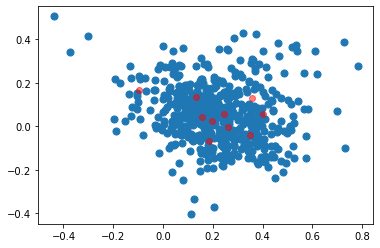

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50);# sprcify axis
centers = kmeans.cluster_centers_ # specefy cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.5)#plot the centers on top
plt.show()#show the plot


**Excercise 4 - Topic Modelling**

- Use sascat_expert
- Think about what could be the appropriate text preprocessing steps
- Discover what are the topics (10) using LDA of the sascat dataset
)
- Please comment on what you would name each topic?

In [ ]:
import codecs, os
content = []
doc = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sascat_excerpt.tsv","r").read().strip().split("\n")
for line in doc[2:]:
            sent = line.split("\t")[10]
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                content.append(sent)

In [ ]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(content)

# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in content]

print ("ready!")

ready!


In [ ]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=10, id2word = dictionary, iterations=500)
print ("done!")

done!


In [ ]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)

(0, '0.011*"fund" + 0.011*"assistance" + 0.011*"state" + 0.011*"sec" + 0.011*"country" + 0.011*"government" + 0.011*"use"')
(1, '0.013*"president" + 0.013*"security" + 0.013*"unless" + 0.013*"congress" + 0.013*"certifies" + 0.013*"plo" + 0.013*"appropriation"')
(2, '0.024*"assistance" + 0.024*"state" + 0.021*"government" + 0.016*"make" + 0.011*"president" + 0.011*"sec" + 0.011*"committee"')
(3, '0.032*"government" + 0.031*"belarus" + 0.017*"polish" + 0.014*"support" + 0.014*"state" + 0.014*"debt" + 0.010*"act"')
(4, '0.026*"fund" + 0.026*"abortion" + 0.020*"available" + 0.020*"unfpa" + 0.020*"planning" + 0.020*"family" + 0.020*"sterilization"')
(5, '0.032*"assistance" + 0.028*"state" + 0.024*"country" + 0.024*"foreign" + 0.020*"sec" + 0.016*"united" + 0.012*"fund"')
(6, '0.015*"president" + 0.015*"act" + 0.015*"foreign" + 0.015*"available" + 0.015*"financing" + 0.015*"make" + 0.015*"appropriate"')
(7, '0.025*"state" + 0.018*"fund" + 0.018*"palestinian" + 0.016*"country" + 0.014*"united